<a href="https://colab.research.google.com/github/SwathiMenon/Machine_learning/blob/main/Risk_Factors_Analysis_of_Cardiovascular__Disease_using_knn_and_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset can be used to explore the risk factors of cardiovascular disease in adults. The aim is to understand how certain demographic factors, health behaviors and biological markers affect the development of heart disease.

To start, look through the columns of data and familiarize yourself with each one. Understand what each field means and how it relates to heart health:

    Age: Age of participant (integer)
    Gender: Gender of participant (male/female).
    Height: Height measured in centimeters (integer)
    Weight: Weight measured in kilograms (integer)
    Ap_hi: Systolic blood pressure reading taken from patient (integer)
    Ap_lo : Diastolic blood pressure reading taken from patient (integer)
    Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively.
    Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units( integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.
    Smoke : Whether person smokes or not(binary; 0= No , 1=Yes).
    Alco : Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).
    Active : whether person physically active or not( Binary ;0 =No,1 = Yes ).
    Cardio : whether person suffers from cardiovascular diseases or not(Binary ;0 – no , 1 ‑yes ).

Identify any trends between the different values for each attribute and the developmetn for cardiovascular disease among individuals represented by this dataset . Age, gender, weight, lifestyle practices like smoking & drinking alcohol are all key influences when analyzing this problem set. You can always modify pieces of your analysis until you're able to find patterns that will enable you make conclusions based on your understanding & exploration. You can further enrich your understanding using couple mopdeling technique like Regressions & Classification models over this dataset alongwith latest Deep Learning approach!

dataset: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas

In [47]:
#loading data set
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/heart_data.csv")
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


LET'S USE 2 DIFFFERENT CLASSIFICATION ALGORITHM WHICH IS k-nearest neighbor and support vector mechine and compair the accuracy

1)  K NEARESR NEIGHBOR

data preprocessing

In [48]:
df.isna().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [49]:
df.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

model building using knn

In [50]:
X=df.iloc[:,:-1]
X

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [51]:
y=df.iloc[:,-1:]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [52]:
#sacaling using minmax scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
xc=mms.fit_transform(X)

In [53]:
#splitting dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xc,y,random_state=1,test_size=.50)

In [54]:
#using knn prediction
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [55]:
#prediction
pre=knn.predict(x_test)
pre

array([1, 0, 0, ..., 0, 0, 1])

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre)*100)

59.38285714285715


the accuracy here is 59.38285714285715% let us use SVM to compair this

              precision    recall  f1-score   support

           0       0.59      0.61      0.60     17300
           1       0.60      0.58      0.59     17700

    accuracy                           0.59     35000
   macro avg       0.59      0.59      0.59     35000
weighted avg       0.59      0.59      0.59     35000



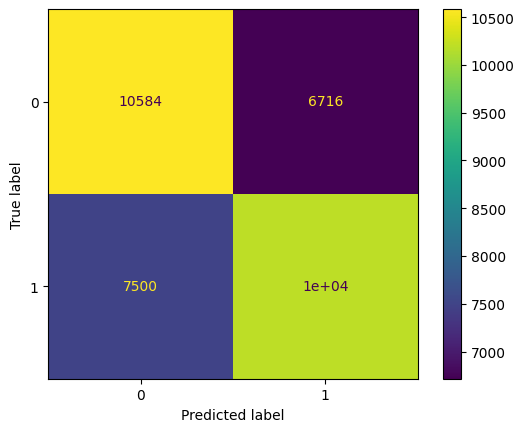

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(ConfusionMatrixDisplay.from_predictions(y_test,pre))
print(classification_report(y_test,pre))

In [58]:
#prediction using svm
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [59]:
y_pred=sv.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

63.91428571428571


              precision    recall  f1-score   support

           0       0.62      0.68      0.65     17300
           1       0.66      0.60      0.63     17700

    accuracy                           0.64     35000
   macro avg       0.64      0.64      0.64     35000
weighted avg       0.64      0.64      0.64     35000



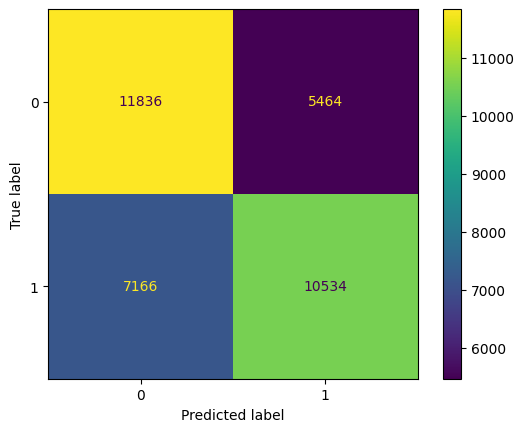

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

so svm gives more precise value in this case